In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Stat
grades=pd.Series(range(80,100,2))
print(grades.shape, grades.ndim)
print(grades)
print()
print(len(grades))
print(grades.describe())
print()
print(grades.mean(), grades.std(), grades.min() ) 

In [ ]:
#Series
height=pd.Series([165, 175, 190], index=['tirbouchon', 'Mino', 'Mejri'])
print(height)
print(height.Mino, height['Mino'], height[1])

In [ ]:
#Dataframe
scores=np.array([[87,100,90,82,95],[90, 85, 97, 100,88], [95,95,80,86,100]])
print(type(scores), scores.shape)
print(scores)
print()
scores_df=pd.DataFrame(scores)
print(scores_df.shape)
print(scores_df)
print()
scores_df=pd.DataFrame(scores, columns=['Django', 'Ringo', 'Mino', 'Sosso', 'Gunslinger'],\
                      index=['Math', 'Eco', 'Physics'])
print(scores_df)
print()
scores_df.columns=['Django', 'Mino', 'Yukimura', 'Sosso', 'RuyjinSama']
scores_df.index=['IT' , 'ML', 'Python']
print(scores_df)
print()
print(scores_df.describe()) #it applies to columns#
print(scores_df.mean())
print(scores_df.T)
#scores_df.T.describe()

In [ ]:
#DataFrame slicing
Temp=np.array([[18, 29, 20,14],[20, 32, 18,13],[19, 36, 26,10],[22, 32, 25,16]])
Temp_tb=pd.DataFrame(Temp, columns=['Spring', 'Summer', 'Fall', 'Winter'])
print(Temp)
print(Temp_tb)
print()
#Temp_tb[['Spring','Fall']]
#Temp_tb.loc[:,['Spring','Fall']]
#Temp_tb.Spring
#Temp_tb.iloc[0:1,0:2]
Temp_tb.iloc[0:2,[0,2]]
Temp_tb.iloc[2]={'Spring':24, 'Summer':40, 'Fall':28, 'Winter':8}
Temp_tb
Temp_tb.loc[[0,1],"Spring":"Fall"]
print(Temp_tb.at[1, 'Winter'],Temp_tb.iat[0,3])

In [ ]:
#Sorting
Temp_tb.sort_index(axis=1)
Temp_tb.sort_values(by=2, axis=1, ascending=True)
Temp_tb.T.sort_values(by=2)
Temp_tb[(Temp_tb<=20) & (Temp_tb>=10) ]
Temp_tb[lambda x: x>=20 ]

In [ ]:
#DataFrame & sklearn
iris_data=load_iris()
iris_data.keys()
iris_data.DESCR
iris_feature, iris_target=iris_data['data'],iris_data['target']
print(type(iris_feature), iris_feature.shape,type(iris_target), iris_target.shape)
print()
#iris_full=np.hstack([iris_feature,iris_target.reshape(150,1)])
#iris_full.shape
#iris_full[:5, ]
iris_feature_df=pd.DataFrame(iris_feature, columns=iris_data['feature_names'])
#iris_feature_df.head()
#iris_feature_df.shape
iris_feature_df.rename(columns={'sepal length (cm)':'S Length' ,'sepal width (cm)':'S Width' ,
                                'petal length (cm)':'P Length','petal width (cm)':'P Width' }, inplace=True)
#iris_feature_df.head()
#iris_feature_df.tail()
print()
iris_target_df=pd.DataFrame(iris_target, columns=['target'])
iris_target_df.loc[iris_target_df['target']==0, 'label']='Setosa'
iris_target_df.loc[iris_target_df['target']==1, 'label']='Versicolor'
iris_target_df.loc[iris_target_df['target']==2, 'label']='Virginica'
iris_target_df.head()

In [ ]:
#concatenate
iris_full_df=pd.concat([iris_feature_df, iris_target_df],axis=1)
iris_full_df.shape
iris_full_df.tail()
#subsetting
#versicolor_df=iris_full_df[iris_full_df.label=='Versicolor']#.reset_index(drop=true)
#versicolor_df.head()


In [ ]:
versicolor_df['genera']= versicolor_df['target']+'_'+versicolor_df['label'].values.astype(str)
versicolor_df.head()
#versicolor_full_df=versicolor_df.drop(columns=['target','label'])
#versicolor_full_df.head()

In [ ]:
#Descriptive Statistics
iris_full_df.iloc[:, :]
iris_full_df.drop(['target'], axis=1)#.describe()
#iris_full_df[['S Length']].describe()
#iris_full_df.groupby(['label']).describe()#.T
#iris_full_df.iloc[:, [0,1,2,3,4,5]].groupby(['label']).describe()
iris_full_df.drop(['target'], axis=1).cov()#.corr()
#iris_ovh=pd.get_dummies(iris_full_df['label'])
#iris_ovh

In [ ]:
#combining Dataframes
class_df=pd.DataFrame({'lec_id':['F1501','F1502','F1503','F1504','F1505'],
'stu_reg':[70,55,60,30,90],
'course_n':['MDN101','CN306','MOD104','MOD105','MOD206'],
'CAG':[3,2.98,3.3,3.4,2.7]})
crs_eval=pd.DataFrame({'lec_id':['F1501','F1502','F1503','F1504','F1505'],
'stu_reg':[60,70,90,40,14],
'course_n':['MDN101','CN306','MOD104','MOD104','MOD206'],
'CES':[4,3.9,4.4,4.7,4.2]})
class_df
#crs_eval
#merged_df0=pd.concat([class_df, crs_eval],axis=1)
merged_df0=pd.merge(class_df, crs_eval,how='outer',on=['lec_id','course_n'])
merged_df0

In [ ]:
merged_df1=merged_df0
#merged_df1[['lec_id','course_n','stu_reg_x','CES']]
#merged_df2=pd.merge(class_df, crs_eval,how='outer',on=['lec_id','course_n'])
#merged_df2=pd.merge(class_df, crs_eval,how='inner',on=['lec_id','course_n'])
#merged_df2=pd.merge(class_df, crs_eval,how='right',on=['lec_id','course_n'])
#merged_df2
class_df1=class_df.set_index(['lec_id','course_n'])
#class_df1
crs_eval1=crs_eval.set_index(['lec_id','course_n'])#[['CES']]
#crs_eval1
merged_df3=class_df1.join(crs_eval1, how='outer')
merged_df3
#removing row with specific value
merged_df3[merged_df3['CES'].isin([3.9])]
#removing row with NaN
merged_df3.dropna()

In [ ]:
#one hot Vector
auto_firms=['Hundai', 'Honda', 'Kia', 'Audi', 'Benz', 'Hundai','Benz','Audi','Hundai',\
           'Kia','Honda','Kia','Audi','Hundai','Benz']
year=list(range(1990,2005,1)); rank=list(range(15))
auto_df=pd.DataFrame({'Year':year, 'Rank':rank, 'Constructor':auto_firms})
auto_df
#set(auto_firms)
#am_onehot=pd.get_dummies(auto_df['Constructor'])
#am_onehot#.sum()
#auto_df.join(am_onehot)

In [ ]:
#String concatenation splitting
string1="""I have a dream"""
string2='that one day every valley shall be exalted, every hill and mountain shall be made low, the rough places will be made plain'
len(string2)
string=str(1.65)
string1[:5]
string2.count('dream')
string_l=list(string1)
string_M=string1+' '+string2
string_M2=':'.join([string1,string2])
string_sp=string_M.split(',')
#print(string_sp, end='.')
string_sp, len(string_sp)

In [ ]:
#Slicing in a serie
class_df=pd.DataFrame({'lec_id':['F1501','F1502','F1503','F1504','F1505'],
'stu_reg':[70,55,60,30,90],
'course_n':['MDN101','CNN306','MOD104','MOD105','MOD206'],
'CAG':[3,2.98,3.3,3.4,2.7]})
class_df
#class_df['lec_id'].str.slice(2)
class_df['i_course']=class_df['course_n'].str.slice(3)
pd.to_numeric(class_df['i_course'])
class_df['i_lec']=class_df['lec_id'].str.split('F').str[1]
pd.to_numeric(class_df['i_lec'])
class_df['i_lec2']=class_df['lec_id'].str.slice(1,4)
pd.to_numeric(class_df['i_lec2'])
class_df

In [ ]:
#ASCII
#A to Z:65 to 90
#a to z: 97 to 122
print(ord('A'),chr(65))

mush=['x','s','n','t','p'],['x','s','y','t','a'],\
['b','s','w','t','l'],['x','y','w','t','p']
mush
mush_asc=[ord(j) for i in mush for j in i ]
print(mush_asc)
mush_asc_array=np.array(mush_asc).reshape(4,5)
mush_asc_array


In [ ]:
# formatted-strings
f'A floating number is {3.1419239494 :<10.4f}.'
f'center aligned case is {3.1419239494 :^10.4f}.'
f'samples of integer and binary numbers {21:2} {21:5b}'
f'ASCII code conversion {65:2c} and {98:2c}'
f'{"Python :":10} {98:10}'
Name=['Youngsun', 'Jackadimus', 'Mino']
Age=[45, 88, 39]
for name, age in zip (Name, Age):
    print(f'happy {age}th birdhday dear {name}!!')

In [ ]:
#Data Files
irisdata=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#or0, 1st row not used for column labels
irisdata.columns=['SepalL', 'SepalW', 'PetalL', 'PetalW', 'Name']
#or names=[]
#irisdata.head(10)
print(len(irisdata), irisdata.shape)
#Saving data
#irisdata.to_csv(r"C:\Users\minam\Dev py\Coursera\iris.csv", index=False)
#Reading data  
iris=pd.read_csv(r"C:\Users\minam\Dev py\Coursera\iris.csv")
iris.head()

In [ ]:
#Preparing Canvas
iris=pd.read_csv(r"C:\Users\minam\Dev py\Coursera\iris.csv")
#iris.columns=['SepalL', 'SepalW', 'PetalL', 'PetalW', 'Name']
iris.head(10)
#list(iris.columns[:4])
#figsize in inches, default width & height figsize=[6.4,4.8 ]
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)# adding subbplot (row, column, sequence)
plt.subplot(2,3,2)
plt.subplot(236)#comas can be omitted
plt.tight_layout()#automatic layout
plt.show

#attaching subplots
fig=plt.figure()
fig1=fig.add_subplot(211)
fig2=fig.add_subplot(212)
fig1.plot(range(4))
fig2.bar(range(4),range(1,5))
plt.tight_layout()
plt.show

#create common layout for subplots
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(6,4))
ax1.plot(range(4))
ax2.bar(range(4), range(1,5))
plt.tight_layout()
plt.show


In [ ]:
#Drawing multiple functions sharing same axe x on a canvas
x=np.arange(1,9,0.5)
plt.plot(x,x,'b',x,x**(3/2), 'r--o', x, np.sqrt(x), 'gs')
plt.title('multiple graphs with same x values ')
plt.grid
plt.show()


In [ ]:
x=np.linspace(0, 2*np.pi,400)
y=np.sin(x)
plt.figure(figsize=(8,8))
plt.plot(x,y,'r')
plt.title('Sine Graph',fontsize=15)
plt.xlabel('x range', fontsize=12)
plt.ylabel('Sine values', fontsize=12)
plt.grid()
plt.show()
#plt.savefig('Sinegraph.png')


In [ ]:
#2bars charts in a canvas with subplots
year, number=(['1st Year','2nd Year','3rd Year','4th Year'], [14,11,15,18])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(year, number, width=0.35, color='r')
plt.title('Vertical Bar Chart')
plt.xlabel('Class')
plt.ylabel('Students registered')
plt.grid()
plt.subplot(122)
plt.barh(year, number, 0.4, color='g')
plt.title('Horizontal Bar Chart')
plt.xlabel('Students')
plt.grid()
plt.show()

In [ ]:
#Juxtaposing 2 different data for comparison on a bar plot
name=['Raheem', 'Harry Cain', 'Rashford', 'Walker']
tv_watch, sns_use=([40,50,60,70],[70,60,50,40])
name_i=np.arange(len(name))
width=0.2
plt.figure(figsize=(10,4))
plt.bar(name_i-width/2,tv_watch,width,color='r', label='TV')
plt.bar(name_i+width/2,sns_use,width,color='b', label='SNS')
plt.xticks(name_i,name)
plt.title('Time spent in Media services')
plt.xlabel('Names')
plt.ylabel('Minutes/week')
plt.legend(loc='center')#'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 
#'lower center', 'center left', 'center right','best'
plt.grid()
plt.show()

In [ ]:
name=['Raheem', 'Harry Cain', 'Rashford', 'Walker']
tv_watch, sns_use=([40,50,60,70],[70,60,50,40])
name_i=np.arange(len(name))
width=0.2
fig,ax=plt.subplots(figsize=(10,4))
plt.bar(name_i-width/2,tv_watch,width,color='r', label='TV')
plt.bar(name_i+width/2,sns_use,width,color='b', label='SNS')
ax.set_xticks(name_i)
ax.set_xticklabels(name)
ax.set_title('Time spent in Media services')
ax.set_xlabel('Names')
ax.set_ylabel('Minutes/week')
ax.legend(loc='upper center')
ax.grid()
plt.show()

In [ ]:
#Simple histogram
x=np.random.normal(0,3,2000)
n,bins,patches=plt.hist(x, bins=10, alpha=0.8, color='b', edgecolor='black')
plt.setp(patches[0:4],'facecolor', 'r')
plt.setp(patches[4],'facecolor', 'y')
#plt.xlim(min(bins), max(bins))
plt.show()
print(f'array of frequency {n}\narray of edga values{np.round(bins,2)} \n{patches}')


In [ ]:
x=np.random.normal(-7,3,2000)
y=np.random.normal(0,3,2000)
z=np.random.normal(7,3,2000)
bins=np.linspace(-20,20,50)
fig,ax=plt.subplots()
ax.hist([x,y,z], bins, label=['x','y','z'], color=['b','orange', 'r'])
ax.legend(loc='upper right')
plt.show()

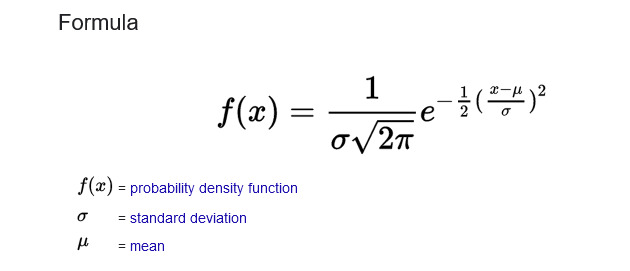

In [ ]:
def stnd_func(mu, sigma,x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
mu=100; sigma=10; sample=1000
pdf=np.random.normal(mu, sigma,sample)
bins=np.linspace(60,140,80)
fig, ax =plt.subplots()
ax.hist(pdf, bins, color='b',edgecolor='black')
ax.plot(bins,stnd_func(mu, sigma,bins)*sample, 'r o')
plt.show()

In [ ]:
#histogram with iris data
iris=pd.read_csv(r"C:\Users\minam\Dev py\Coursera\iris.csv")
setosa= iris.iloc[0:50,:]
versicolor= iris.iloc[50:100,:]
virginica=iris.iloc[100:150,:]
names= ['setosa', 'versicolor', 'virginica']
kinds=[setosa, versicolor, virginica]
fig,ax=plt.subplots()
ax.hist([setosa.SepalL,versicolor.SepalL, virginica.SepalL],bins=20, 
        label =names, color=['r', 'yellow', 'g'])
ax.set_title('Distribution of sepals by length',fontsize=12)
ax.set_xlabel('Sepal Length (cm)',fontsize=8)
ax.set_ylabel('Frequency',fontsize=8)
ax.legend(fontsize=8, loc='upper right')
plt.show()

In [ ]:
#Scatterplot
fig, ax=plt.subplots(figsize=(8,5))
mk_size=80
ax.scatter(setosa.PetalL,setosa.PetalW, marker='o', s=mk_size, c='r', label='Setosa')
ax.scatter(versicolor.PetalL,versicolor.PetalW, marker='+', s=mk_size, c='orange', label='versicolor')
ax.scatter(virginica.PetalL,virginica.PetalW, marker='<', s=mk_size, c='g', label='virginica')

ax.set_title('Iris Distribution',fontsize=12)
ax.set_xlabel('Petal Length (cm)',fontsize=6)
ax.set_ylabel('Petal Width (cm)',fontsize=6)
ax.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
#Scatterplot using for loop
fig, ax=plt.subplots(figsize=(8,5))
names= ['setosa', 'versicolor', 'virginica']
kinds=[setosa, versicolor, virginica]
for name,kind in zip(names, kinds):
    ax.plot(kind.PetalL,kind.PetalW, marker='*', ms=10, linestyle=' ', markeredgecolor='black',
            label=name)
ax.set_title('Iris Distribution by kinds',fontsize=16)
ax.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
ax.legend(loc='upper left',fontsize=8)
plt.show()

In [ ]:
#Boxplot
fig, ax=plt.subplots(figsize=(8,5))
ax.boxplot(np.array(iris.iloc[:,0:4]), sym='bo', showmeans=True )
ax.set_xticklabels(iris.columns[:4])
ax.set_ylabel('cm')
ax.set_title('Iris data Boxplot')
plt.show()
#box limits are quartile, orange is mediane, bar is max and min value, triangle is the mean


In [ ]:
#Pieplot
name=['Raheem', 'Harry Cain', 'Rashford', 'Walker']
tv_watch, sns_use=([40,50,60,70],[70,60,50,40])
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(8,5))
ax1.pie(tv_watch, explode=(0.1,0.2,0,0), labels=name,textprops={'fontsize':12}, autopct='%.2f%%',
       shadow=True, startangle=90, colors=['b','r','y', 'grey'])
ax2.pie(sns_use, labels=name, autopct='%.1f%%',shadow=True, startangle=180,
        wedgeprops={'width':0.6,'edgecolor':'w', 'linewidth':2 })
ax1.set_title('TV Watching behaviour', fontsize=(16))
ax2.set_title('SNS use behaviour', fontsize=14)
ax1.axis('equal')
fig.tight_layout()
plt.show()

In [ ]:
#drawing on Dataframes
iris.plot(grid=True)
#iris.plot(kind='hist', bins=40, edgecolor='black')
#iris.plot(kind='box', sym='b.', showmeans=True )
#iris.plot(kind='scatter', x='PetalL', y='PetalW')
plt.show()

In [ ]:
year, number=(['1st Year','2nd Year','3rd Year','4th Year'], [14,11,15,18])
students=pd.Series(number, index=year)
#students.sort_index().plot(kind='barh', grid=True, figsize=(8,5))# or sort_values
#plt.show()

students.plot(kind='pie', explode=(0,0,0,0.3),textprops={'fontsize':16}, autopct='%.2f%%',
              shadow=True, startangle=0)
plt.ylablel=(None)
plt.show()

In [ ]:
#Seaborn plotting
fig,ax=plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')  #white, dark, ticks,etc...
ax=sns.scatterplot(x='SepalL', y='SepalW', palette='bright', hue='Name', style='Name',
                  s=80, data=iris)
ax.set_title('Iris Distribution by Sepal', fontsize=14)
#ax.set(xlabel='Sepal length(cm)', ylablel='Sepal width(cm)')
ax.set_xlabel('Sepal Length (cm)',fontsize=8)
ax.set_ylabel('Sepal width (cm)',fontsize=8)
ax.legend(loc='upper right', fontsize=12)
plt.show()


In [ ]:
#sns.boxplot(data=iris)
#plt.show()
#sns.boxplot(data=iris, x='Name', y='SepalW',)
#plt.show()
#sns.jointplot(x='PetalL', y='PetalW',data=iris, kind='kde') #kde=kernel density estimation
#plt.suptitle('Petal length and petal width sublot', y=1.02)
#plt.show()
#Violinpot: distribution of quantitative data-boxplot with density information
sns.violinplot(data=iris)
plt.show()
#implot: linear regression with 95% confidence interval
#sns.lmplot(data=iris, x='PetalL', y='PetalW', palette='bright', height=5, aspect=1.4)#, hue='Name'
#plt.show()

In [ ]:
#Class creation MinoCalculator.py
class calculation:
    def __init__(self, first,second):
        """initilaise attributes"""
        self.first=first
        self.second=second
        
        if second==0:
            raise ValueError(f'number musn\'t be 0')
    def add(self):
        return self.first+self.second
                             
    def mult(self):
        
        return self.first*self.second
    
    def subs(self):
        """substraction"""
        return self.first-self.second
    def div(self):
        """Division"""
        return self.first / self.second
#%save Minocalculator.py 1-22 #magic for making a script file with py extension

In [ ]:
#constructing an object
c=calculation(10,3)
print(f'first number is {c.first}\n' + f'second number is {c.second}\n')
print(f'Addition: {c.add()}\n'+
     f'Multiplication: {c.mult()}\n'+
     f'substraction: {c.subs()}\n'+
     f'Division: {c.div():.2f}\n')

In [ ]:
#calculation.div(c)
import Minocalculator
c=calculation(10,3)
print(f'Addition: {c.add()}\n'+
     f'Multiplication: {c.mult()}\n'+
     f'substraction: {c.subs()}\n'+
     f'Division: {c.div():.2f}\n')

import Minocalculator as mc
d=mc.calculation(10,3)
print(f'Addition: {d.add()}\n'+
     f'Multiplication: {d.mult()}\n'+
     f'substraction: {d.subs()}\n'+
     f'Division: {d.div():.2f}\n')
#oblist=[c,d]
#for i in oblist:
#    print(i.mult(), end=' ,')

In [ ]:
#Method overriding MinoCalculator2.py

class calculation_2(calculation):
    """adding power """
    def __init__(self, first,second,third):
        """initilaise attributes"""
        super().__init__(first,second)
        self.third=third
                
    def pow(self):
        return self.first**self.second+self.third
                             
    def div(self): #method overriding
        """Division"""
        if self.second==0:
            return 0
        else:
            return self.first / self.second
e=calculation_2(9,2,3)
print(e.pow(),e.add(),e.subs(), e.mult(),e.div())
#calculation_2(9,0,3).div() #result is error

In [ ]:
#Class inheritance
class person:
    def __init__(self, first,last):
        self.firstname=first
        self.lastname=last
    def __repr__(self):
        return (self.firstname+' ' +self.lastname)

In [ ]:
x=person('Amine', 'HAMOUDA')
repr(x)

In [ ]:
class Employee(person):
    def __init__(self, first,last,staffN):
        super().__init__(first,last)
        self.staffnumber=staffN
    def __repr__(self):
        return (f'Staff name: {super().__repr__()},\n'+ f'Staff number: {self.staffnumber}\n')

In [ ]:
y=Employee('Amine','HAMOUDA','0666669')
y